# World Cup Analysis Project

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [128]:
#Reading dataset
df = pd.read_csv("matches_1930_2022.csv")

#Let's print some rows to verify everything is ok
df.columns

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long'],
      dtype='object')

# Match Performance Analysis
## Which teams had the highest average goals scored per match in the tournament?

In [53]:
#Getting scores from each National Team, as home and away team, and match count
#Home scores and matches
home_score = df.groupby("home_team")["home_score"].sum()
home_matches = df.groupby("home_team").size()

#away scores and matches 
away_score = df.groupby("away_team")["away_score"].sum()
away_matches = df.groupby("away_team").size()

#Now lets merge these series to get more relevant info
NT_scores = home_score.add(away_score, fill_value = 0).sort_values(ascending=False) # Adding a 0 instead of a nill value so sum is correct
NT_matches_count = home_matches.add(away_matches, fill_value = 0)

#Getting rid of teams that have played less than 40 matches as they are probably outliers
Filtered_NT_matches_count = NT_matches_count[NT_matches_count > 40].sort_values(ascending=False)

#Calculating Average goal score per match
goal_avg = (NT_scores / Filtered_NT_matches_count).sort_values(ascending = False)
filtered_goal_avg = goal_avg[Filtered_NT_matches_count.index].sort_values(ascending = False)

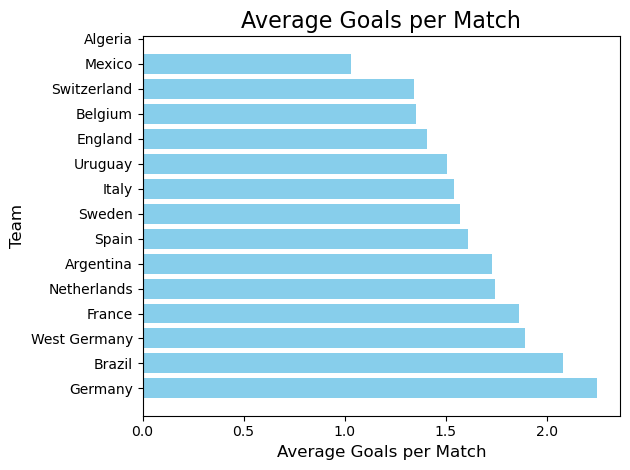

In [54]:
plt.barh(goal_avg.index, goal_avg.values, color='skyblue')
plt.title('Average Goals per Match', fontsize=16)
plt.xlabel('Average Goals per Match', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()


## How does the home team's performance compare to the away team's performance in terms of goals scored?

In [60]:
#Calculating home and away goals per match per team
avg_home_goals = home_score / home_matches
avg_away_goals = away_score / away_matches

teams = avg_home_goals.index.intersection(avg_away_goals.index)
avg_home_goals = avg_home_goals[teams]
avg_away_goals = avg_away_goals[teams]

#Pick top 20 teams by total average goals (home + away)
combined_avg = avg_home_goals + avg_away_goals
top_teams = combined_avg.sort_values(ascending=False).head(20).index

# Filter for those top teams
home_vals = avg_home_goals[top_teams]
away_vals = avg_away_goals[top_teams]


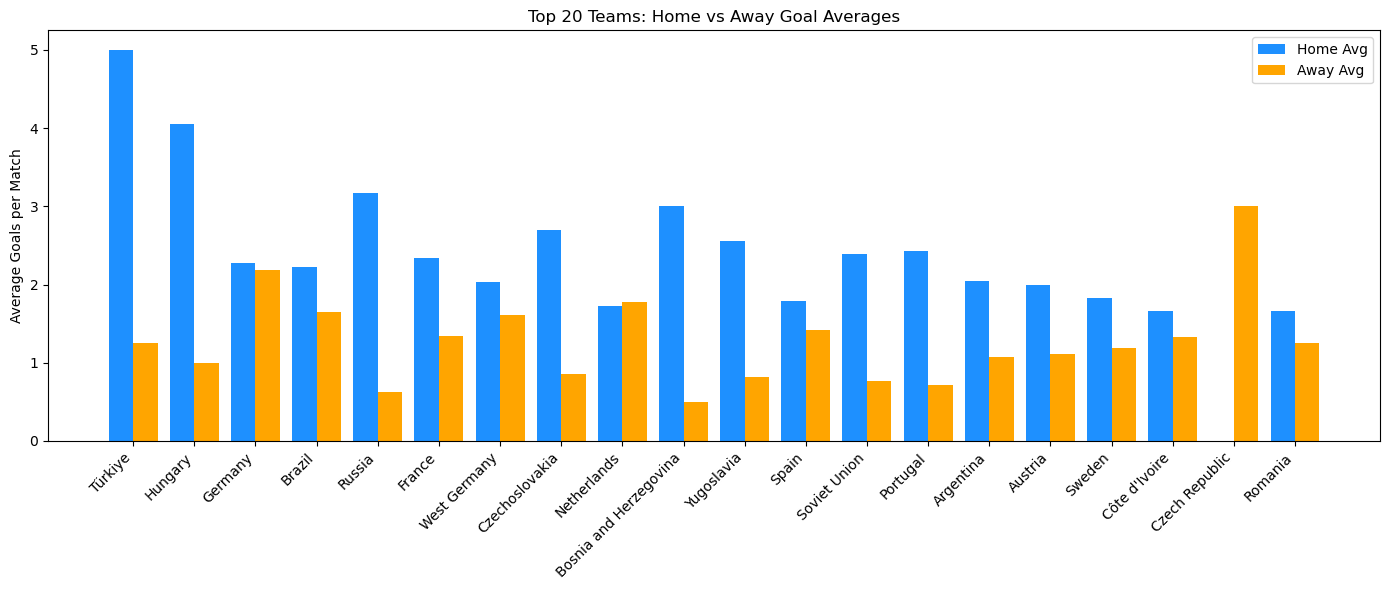

In [61]:
x = range(len(top_teams))
bar_width = 0.4

plt.figure(figsize=(14, 6))
plt.bar([i - bar_width/2 for i in x], home_vals, width=bar_width, label='Home Avg', color='dodgerblue')
plt.bar([i + bar_width/2 for i in x], away_vals, width=bar_width, label='Away Avg', color='orange')

# Labels and titles
plt.xticks(ticks=x, labels=top_teams, rotation=45, ha='right')
plt.ylabel("Average Goals per Match")
plt.title("Top 20 Teams: Home vs Away Goal Averages")
plt.legend()
plt.tight_layout()
plt.show()

## Is there an advantage when playing home or away?

In [150]:
#Calculating home, away wins + draws for each National Team
home_wins = df[df["home_score"] > df["away_score"]]["home_team"].value_counts()
away_wins = df[df["home_score"] < df["away_score"]]["away_team"].value_counts()
draws = df[df["home_score"] == df["away_score"]]["home_team"].value_counts()

#Calculating total matches played per NT
Total_matches = home_wins + away_wins + draws

#Since we already have home/away matches count lets leverage them
home_win_ratio = home_wins / home_matches
away_win_ratio = away_wins / away_matches


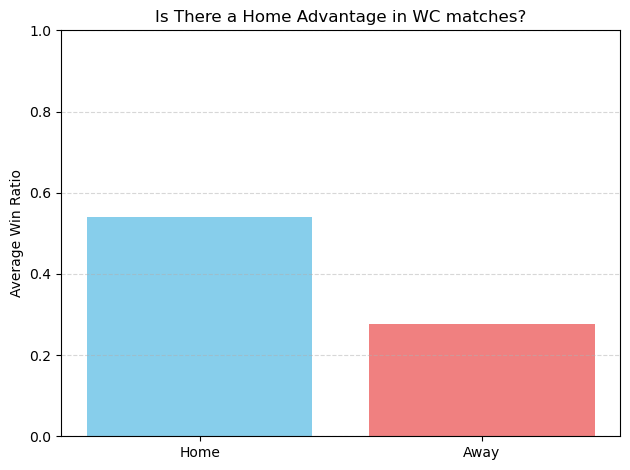

In [152]:
avg_home_win_ratio = home_win_ratio.mean()
avg_away_win_ratio = away_win_ratio.mean()

plt.bar(["Home", "Away"], [avg_home_win_ratio, avg_away_win_ratio], color=["skyblue", "lightcoral"])
plt.ylabel("Average Win Ratio")
plt.title("Is There a Home Advantage in WC matches?")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

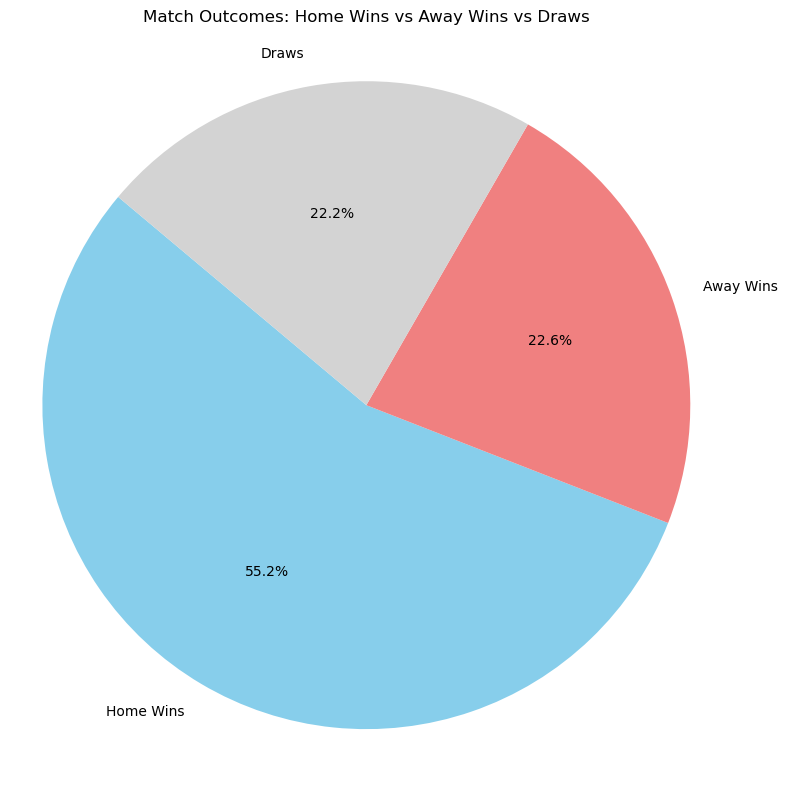

In [154]:
# Sum the total number of each outcome
home_total = home_wins.sum()
away_total = away_wins.sum()
draw_total = draws.sum()

# Labels and sizes
labels = ['Home Wins', 'Away Wins', 'Draws']
sizes = [home_total, away_total, draw_total]
colors = ['skyblue', 'lightcoral', 'lightgray']

# Plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Match Outcomes: Home Wins vs Away Wins vs Draws')
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.show()

# Which countries have the best win ratio?

In [90]:
#Getting rid of teams that have played less than 30 matches as they could be outliers
min_matches = 30
filtered_total_matches = Total_matches[Total_matches >= min_matches]

#Calculating win ratio per NT
win_ratio = (home_wins + away_wins/ filtered_total_matches).sort_values(ascending=False)


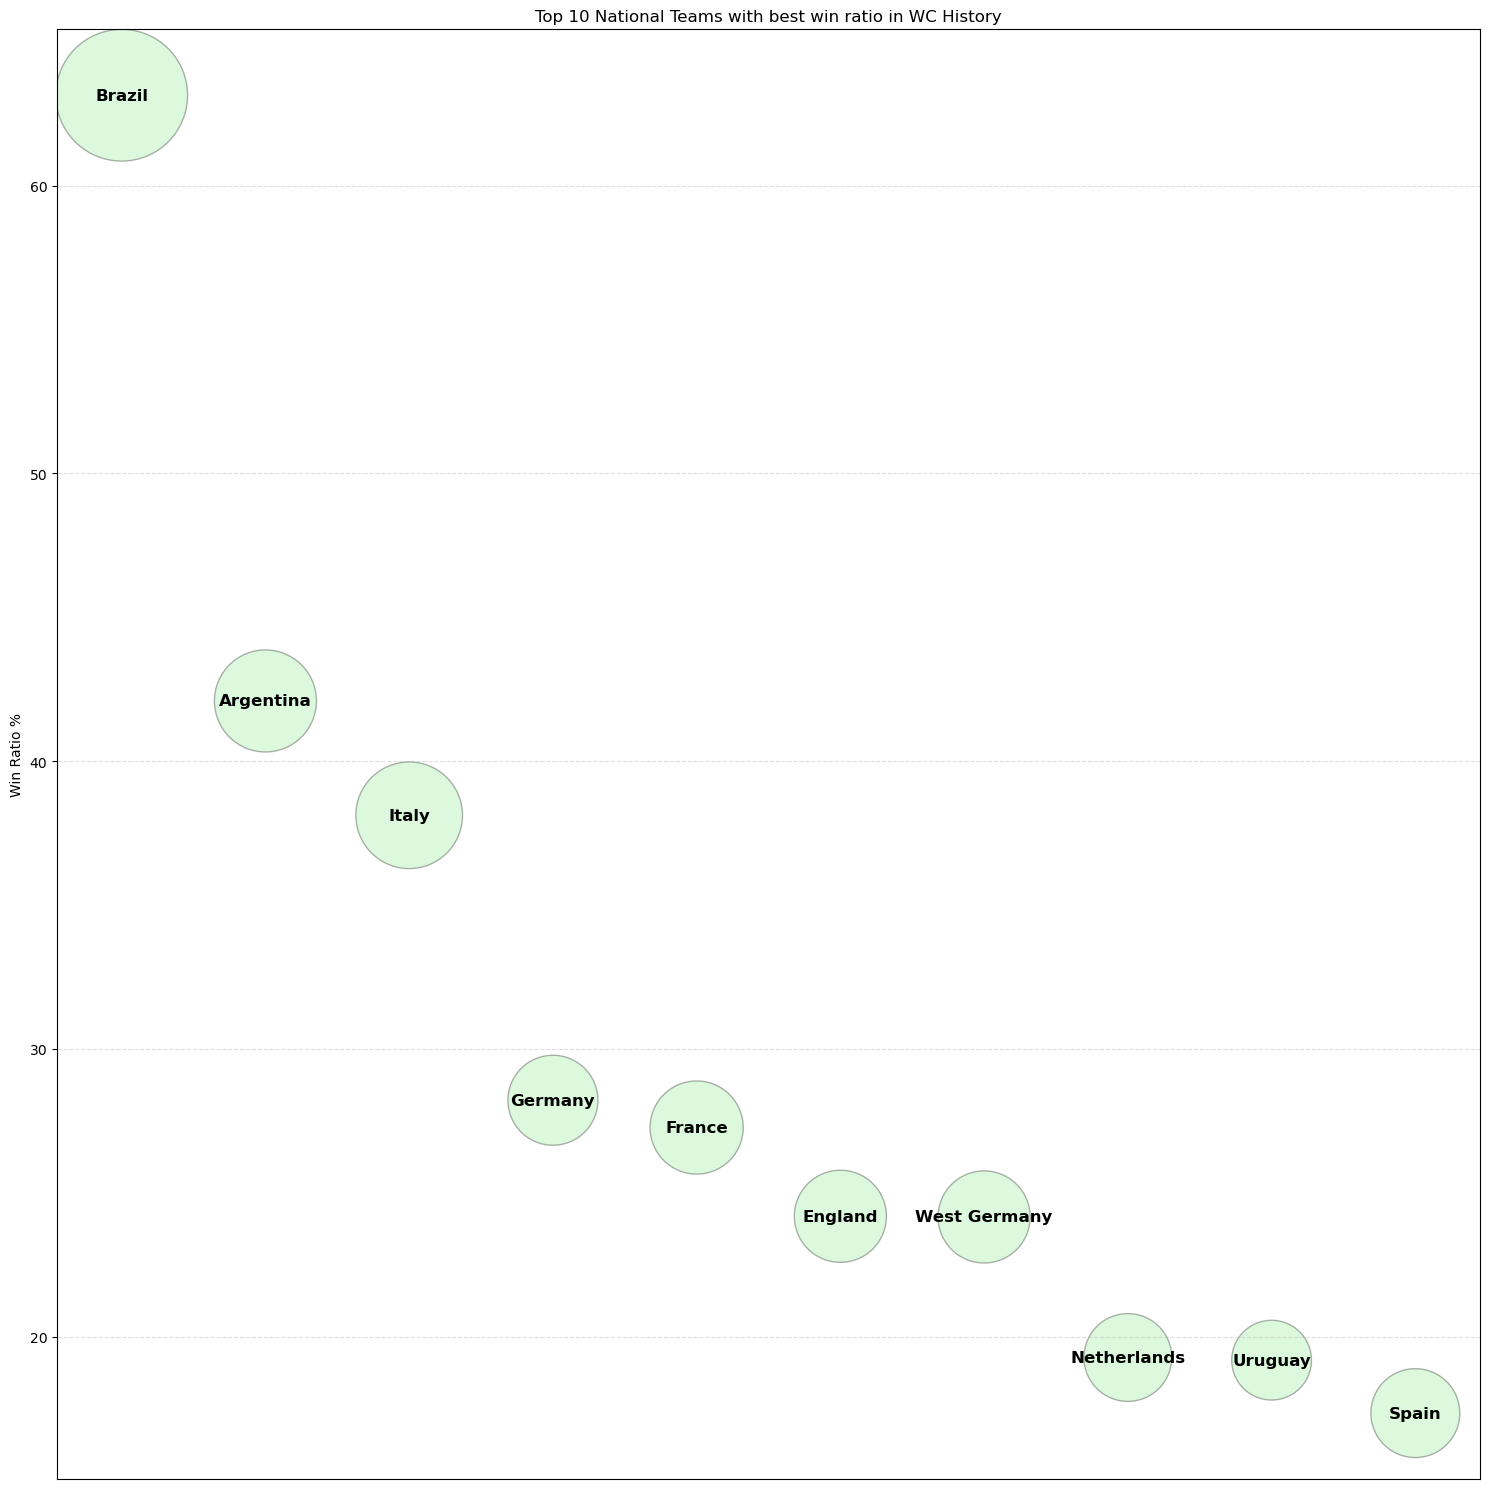

In [105]:
import matplotlib.pyplot as plt

# Make sure all Series are aligned and filtered (e.g., min 30 matches)
teams = win_ratio.index
x = range(len(teams))  # positions on x-axis
y = win_ratio.values
sizes = Total_matches[teams].values * 100  # Scale sizes as needed

plt.figure(figsize=(15, 15))
scatter = plt.scatter(x, y, s=sizes, alpha=0.3, edgecolors='black', color='lightgreen')

# Add team names inside the bubbles
for i, team in enumerate(teams):
    plt.text(x[i], y[i], team, ha='center', va='center', fontsize=12, weight='bold')

plt.xticks([])  # Remove x-axis labels since team names are inside bubbles
plt.ylabel("Win Ratio %")
plt.title("Top 10 National Teams with best win ratio in WC History")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# Goal Analysis

## Has the goal average per match changed over the competition's history?

In [116]:
#Calculating all goals per match per year
home_goals_sum = df.groupby("Year")["home_score"].sum()
away_goals_sum = df.groupby("Year")["away_score"].sum()
goalsxyear = home_goals_sum + away_goals_sum

#Calculating how many matches there have been per year
matches_per_year = df.groupby("Year").size()

avg_goalsxyear = goalsxyear / matches_per_year
print(avg_goalsxyear)

Year
1930    3.888889
1934    4.117647
1938    4.666667
1950    4.000000
1954    5.384615
1958    3.600000
1962    2.781250
1966    2.781250
1970    2.968750
1974    2.552632
1978    2.684211
1982    2.807692
1986    2.538462
1990    2.211538
1994    2.711538
1998    2.671875
2002    2.515625
2006    2.296875
2010    2.265625
2014    2.671875
2018    2.640625
2022    2.687500
dtype: float64


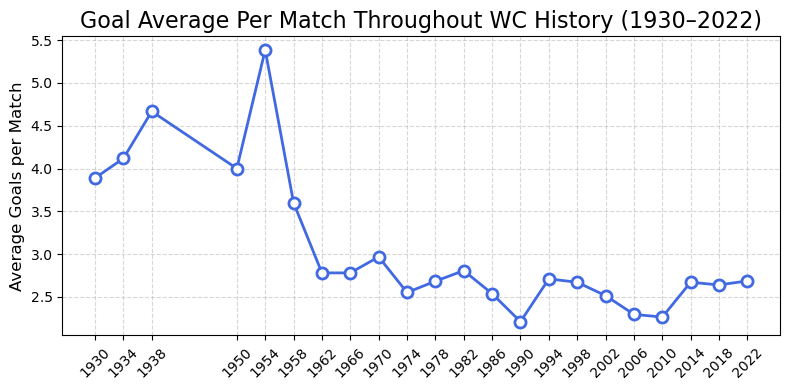

In [127]:
plt.figure(figsize=(8, 4))
plt.plot(avg_goalsxyear.index, avg_goalsxyear.values,
         color='royalblue', linestyle='-', linewidth=2, marker='o',
         markersize=8, markerfacecolor='white', markeredgewidth=2, markeredgecolor='royalblue')

# Labels and title
plt.title("Goal Average Per Match Throughout WC History (1930–2022)", fontsize=16)
plt.xticks(avg_goalsxyear.index, rotation=45)
plt.ylabel("Average Goals per Match", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Penalty Shootout Analysis
## Which teams perform best in penalty shootouts?

In [147]:
#Getting matches that went into penalty shootouts 
penalty_matches = df[df["Notes"].str.contains("won on penalty kicks following extra time", na=False)]

#Getting home team wins in penalty shootouts
home_pen_wins = penalty_matches[penalty_matches["home_penalty"] > penalty_matches["away_penalty"]]
home_pen_wins = home_pen_wins["home_team"].value_counts()

#Getting away team wins in penalty shootouts
away_pen_wins = penalty_matches[penalty_matches["away_penalty"] > penalty_matches["home_penalty"]]
away_pen_wins = away_pen_wins["away_team"].value_counts()

pen_wins = home_pen_wins.add(away_pen_wins, fill_value = 0).sort_values(ascending=False)

pen_wins = pen_wins.head(10)

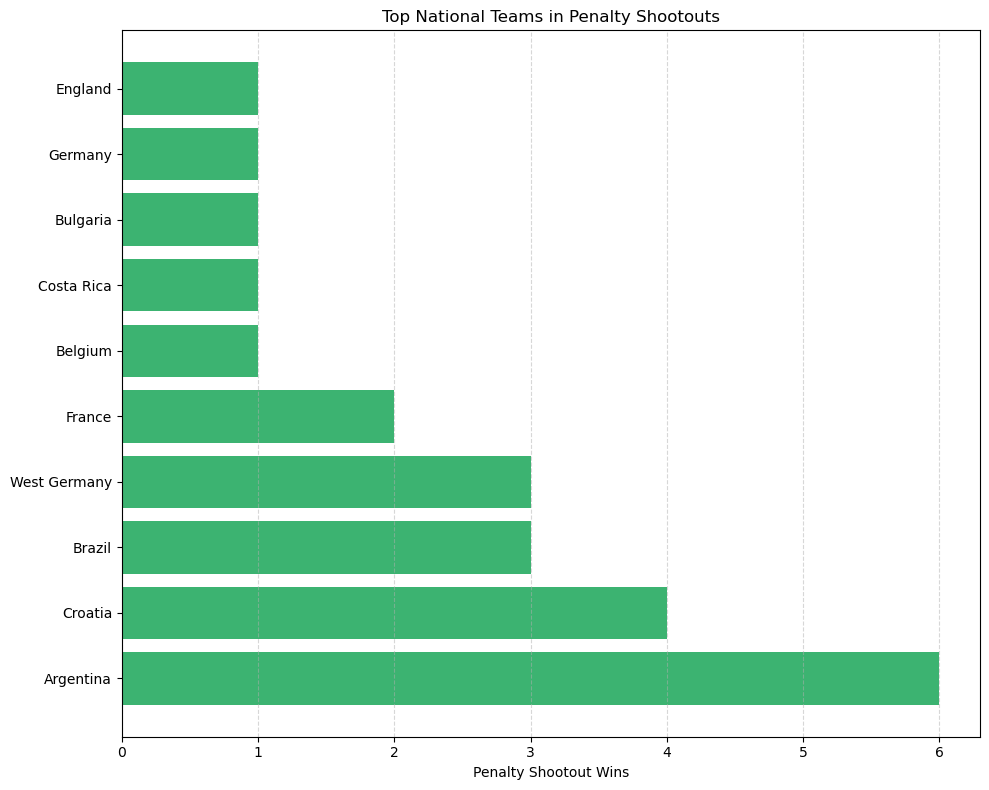

In [148]:
plt.figure(figsize=(10, 8))
plt.barh(pen_wins.index, pen_wins.values, color='mediumseagreen')
plt.xlabel("Penalty Shootout Wins")
plt.title("Top National Teams in Penalty Shootouts")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
